# Support Vector Machines

In [13]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC



In [14]:
iris = load_iris(as_frame=True)
X= iris.data
y= iris.target


In [15]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [17]:
X_new = X.loc[:,'petal length (cm)': 'petal width (cm)']
X_new

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [18]:
y_new= (y==2)

In [19]:
y_new.value_counts(normalize=True)*100

target
False    66.666667
True     33.333333
Name: proportion, dtype: float64

In [20]:
svc_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42)
)

In [21]:
svc_clf.fit(X_new, y_new)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [23]:
import pandas as pd
test_data = pd.DataFrame([[5.5, 1.7], [5.0, 1.5]], columns=['petal length (cm)', 'petal width (cm)'])
svc_clf.predict(test_data)

array([ True, False])

In [24]:
svc_clf.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('linearsvc', LinearSVC(C=1, random_state=42))],
 'transform_input': None,
 'verbose': False,
 'standardscaler': StandardScaler(),
 'linearsvc': LinearSVC(C=1, random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'linearsvc__C': 1,
 'linearsvc__class_weight': None,
 'linearsvc__dual': 'auto',
 'linearsvc__fit_intercept': True,
 'linearsvc__intercept_scaling': 1,
 'linearsvc__loss': 'squared_hinge',
 'linearsvc__max_iter': 1000,
 'linearsvc__multi_class': 'ovr',
 'linearsvc__penalty': 'l2',
 'linearsvc__random_state': 42,
 'linearsvc__tol': 0.0001,
 'linearsvc__verbose': 0}

In [28]:
y_test = [1, 0]
svc_clf.score(test_data, y_test)

1.0

In [29]:
svc_clf.decision_function(test_data)

array([ 0.66163816, -0.22035761])

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.15, random_state=42)


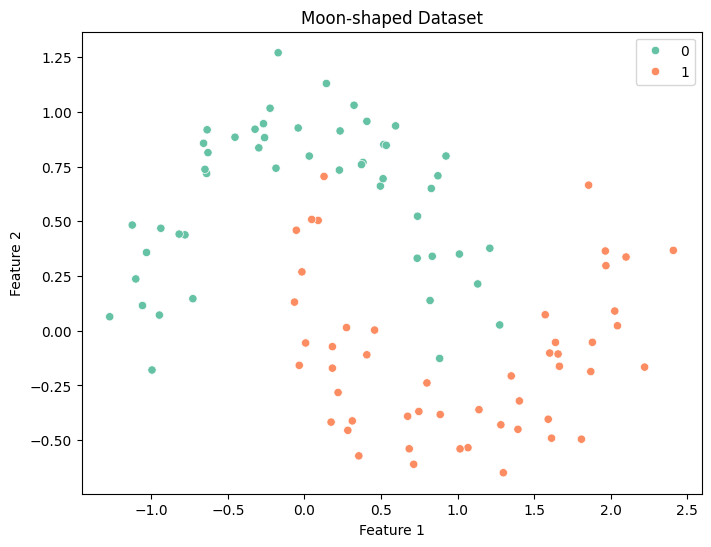

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set2')
plt.title('Moon-shaped Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [32]:
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),

    LinearSVC(C=10, max_iter=1000, random_state=42)
)

In [33]:
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=10, random_state=42))])

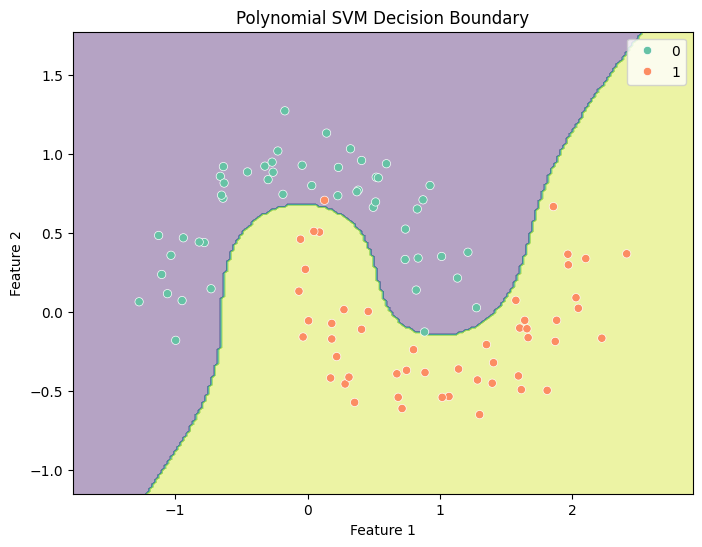

In [34]:
import numpy as np

def plot_decision_boundary(clf, X, y):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))

    # Make predictions on the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set2')
    plt.title('Polynomial SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(polynomial_svm_clf, X, y)

In [35]:
svc = SVC(kernel='poly', degree=3, coef0=1, C=5)

In [36]:
svc_poly = make_pipeline(StandardScaler(), svc)
svc_poly.fit(X_new, y_new)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [37]:
rdf_kernal_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', gamma='scale', C=0.001, random_state=42)
)

rdf_kernal_svm_clf.fit(X_new, y_new)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, random_state=42))])